Oasis Infobyte

Task : Car Price Prediction with Machine Learning

Name: M.Manaswini

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [2]:
warnings.filterwarnings("ignore")

Loading Data

In [3]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data = data.drop_duplicates()

Visualizing Data

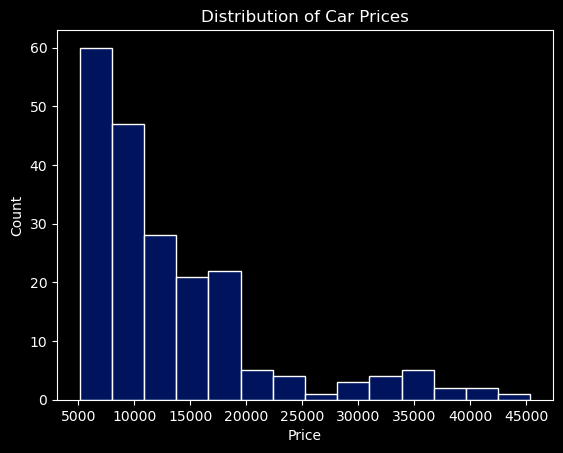

In [12]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(data['price'])
plt.title('Distribution of Car Prices', color='white')
plt.xlabel('Price',color='white')
plt.ylabel('Count',color='white')
plt.show()


In [24]:
numeric_features = ['wheelbase','carlength','carwidth','carheight','curbweight',
                    'enginesize','boreratio','stroke','compressionratio','horsepower',
                    'peakrpm','citympg','highwaympg','price']

In [25]:
correlation_matrix = data[numeric_features].corr()

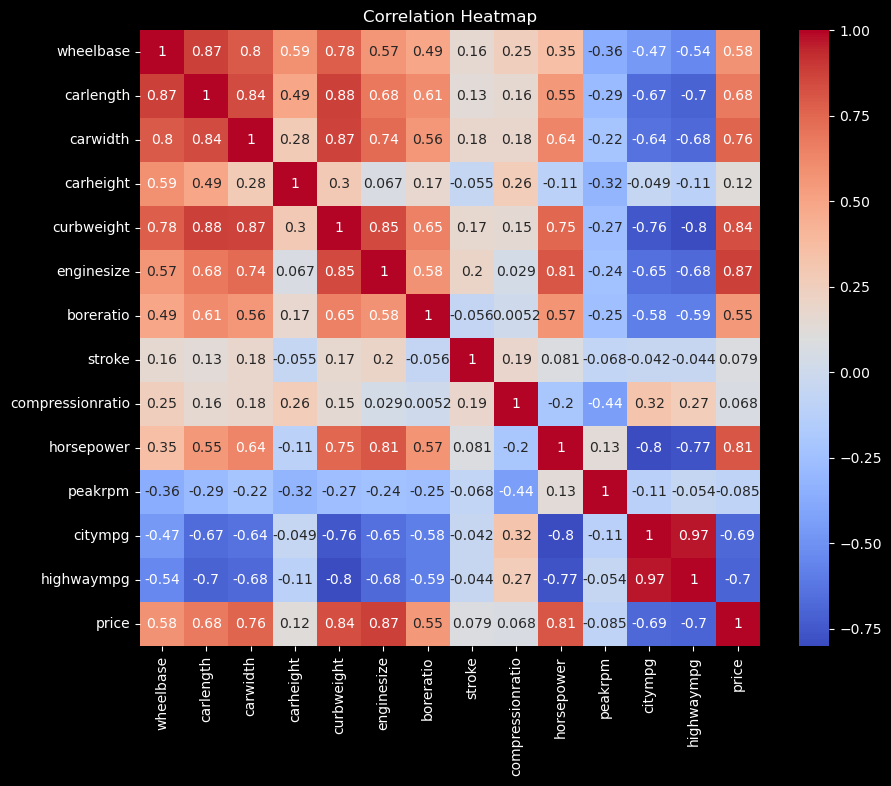

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

Preprocessing Data

In [27]:
feature_cols = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
                'wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber',
                'enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm',
                'citympg','highwaympg']
target_col = 'price'
x=data[feature_cols]
y=data[target_col]

In [28]:
label_encoder = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = label_encoder.fit_transform(x[col])

Splitting Data

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Fitting the Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Evaluating the Model

In [35]:
predictions = model.predict(x_test)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 3989.5350262204074


Deployment and Prediction

In [37]:
new_car_data = [[3,'gas','std','two','sedan','fwd','front',100.0,180.0,68.0,56.0,2500,'ohc','four',
                 120,'mpfi',3.50,2.80,8.5,110,5500,30,38]]

new_car_df = pd.DataFrame(new_car_data,columns=feature_cols)

new_car_encoded=pd.get_dummies(new_car_df,drop_first=True)

new_car_encoded=new_car_encoded.reindex(columns=x_train.columns,fill_value=0)

predicted_price=model.predict(new_car_encoded)

print("Predicted Price:",predicted_price)

Predicted Price: [12632.09458377]
